In [8]:
! pip install openai -U

# ! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 9.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 11.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.8 MB/s eta 0:00:00:00:01


In [9]:
api_base = 'Your Azure OpenAI Service Endpoint' # your endpoint should look like the following https://YOUR_RESOURCE_NAME.openai.azure.com/
api_key="Your Azure OpenAI Service API Key"
deployment_name = 'Your Azure OpenAI Service Deployment Name'
api_version = '2024-02-15-preview' # this might change in the future

In [10]:
import base64
from mimetypes import guess_type

In [11]:
# Function to encode a local image into data URL 
def local_image_to_data_url(image_path):
    # Guess the MIME type of the image based on the file extension
    mime_type, _ = guess_type(image_path)
    if mime_type is None:
        mime_type = 'application/octet-stream'  # Default MIME type if none is found

    # Read and encode the image file
    with open(image_path, "rb") as image_file:
        base64_encoded_data = base64.b64encode(image_file.read()).decode('utf-8')

    # Construct the data URL
    return f"data:{mime_type};base64,{base64_encoded_data}"

In [12]:
image_path = './imgs/demo.png'
data_url = local_image_to_data_url(image_path)

''
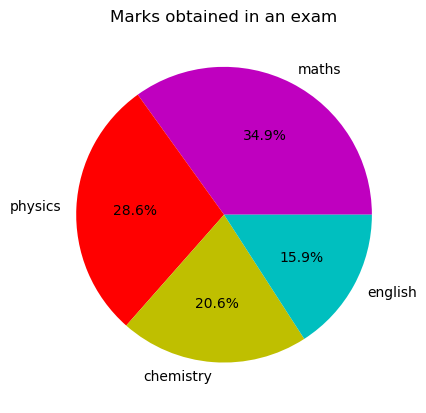

In [13]:
data_url

In [14]:
from openai import AzureOpenAI

In [15]:
client = AzureOpenAI(
    api_key=api_key,  
    api_version=api_version,
    base_url=f"{api_base}openai/deployments/{deployment_name}",
)

In [16]:
response = client.chat.completions.create(
    model=deployment_name,
    messages=[
        { "role": "user", "content": [  
            { 
                "type": "text", 
                "text": "Please create Python code for image, and gen code to use plt to save the new picture under imgs/ and name it gpt-4-vision.jpg." 
            },
            { 
                "type": "image_url",
                "image_url": {
                    "url": data_url
                }
            }
        ] } 
    ],
    max_tokens=2000 
)

In [17]:
result = response.choices[0].message.content

In [18]:
result

"Sure, here is the Python code to generate the pie chart image and save it under `imgs/` with the name `gpt-4-vision.jpg`:\n\n```python\nimport matplotlib.pyplot as plt\n\n# Data to plot\nlabels = 'maths', 'english', 'chemistry', 'physics'\nsizes = [215, 130, 245, 210]\ncolors = ['magenta', 'cyan', 'yellow', 'red']\nexplode = (0.1, 0, 0, 0)  # explode 1st slice\n\n# Plot\nplt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)\nplt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\nplt.title('Marks obtained in an exam')\n\n# Save the figure\nplt.savefig('imgs/gpt-4-vision.jpg')\n\n# Display the plot\nplt.show()\n```\n\nThis code will create a pie chart similar to the one provided and save it to the specified directory and filename. Make sure the `imgs/` directory exists or create it before running the code to avoid errors."

In [19]:
code = ''

begin = result.index('```python') + 9

code = result[begin:]

In [21]:
end = code.index('\n```')

In [23]:
code = code[:end]

In [24]:
code

"\nimport matplotlib.pyplot as plt\n\n# Data to plot\nlabels = 'maths', 'english', 'chemistry', 'physics'\nsizes = [215, 130, 245, 210]\ncolors = ['magenta', 'cyan', 'yellow', 'red']\nexplode = (0.1, 0, 0, 0)  # explode 1st slice\n\n# Plot\nplt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)\nplt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\nplt.title('Marks obtained in an exam')\n\n# Save the figure\nplt.savefig('imgs/gpt-4-vision.jpg')\n\n# Display the plot\nplt.show()"

In [25]:
import subprocess

In [26]:
result = subprocess.run(["python", "-c", code], capture_output = True)

In [27]:
result

CompletedProcess(args=['python', '-c', "\nimport matplotlib.pyplot as plt\n\n# Data to plot\nlabels = 'maths', 'english', 'chemistry', 'physics'\nsizes = [215, 130, 245, 210]\ncolors = ['magenta', 'cyan', 'yellow', 'red']\nexplode = (0.1, 0, 0, 0)  # explode 1st slice\n\n# Plot\nplt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)\nplt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\nplt.title('Marks obtained in an exam')\n\n# Save the figure\nplt.savefig('imgs/gpt-4-vision.jpg')\n\n# Display the plot\nplt.show()"], returncode=0, stdout=b'Figure(640x480)\n', stderr=b'')

In [28]:
from IPython.display import Image, display

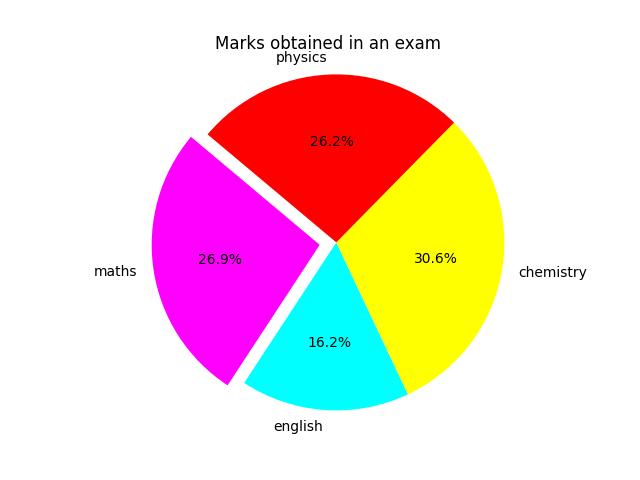

In [29]:
display(Image(filename='./imgs/gpt-4-vision.jpg'))